In [1]:
# DS_Proyecto_02
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se carga el dataset usando libreria pandas
data_properati = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

In [3]:
# Filtro para region con más publicaciones, Capital Federal 
data_properati_1 = data_properati[(data_properati.l2 == "Capital Federal")]

# Filtro para propiedades con más publicaciones, Casa, Departamento, PH (propiedad horizontal)
data_properati_2 = data_properati_1[(data_properati_1.property_type == "Casa")
                                    | (data_properati_1.property_type == "Departamento")
                                    | (data_properati_1.property_type == "PH")]
data_properati_2.shape

(91485, 19)

In [4]:
# Partimos desde el filtro definido en DS_Proyecto_01
data_properati = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

data_properati_1 = data_properati[(data_properati.l2 == "Capital Federal")]
data_properati_2 = data_properati_1[(data_properati_1.property_type == "Departamento") 
                                    | (data_properati_1.property_type == "PH") 
                                    | (data_properati_1.property_type == "Casa")]
data_properati_3 = data_properati_2[(data_properati_2.surface_total <= 1000) 
                                    & (15 <= data_properati_2.surface_total)]
data_properati_4 = data_properati_3[(data_properati_3.price <= 4000000)]
data_properati_5 = data_properati_4[["rooms", "bedrooms", "bathrooms", "surface_total",
                                     "surface_covered", "price", "property_type"]]
data_properati_final = data_properati_5.dropna()

data_properati_final.shape

(81019, 7)

In [5]:
# Empezamos buscandos los valores atípicos, outliers
data_properati_final.describe()
# Probablemente hay datos atípicos en surface_total y price

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81019.000000,81019.000000,81019.000000,81019.000000,81019.000000,8.101900e+04
mean,3.009652,2.002037,1.553821,95.361779,84.928535,2.637725e+05
std,1.308602,1.049673,0.852672,77.253578,156.133119,2.989499e+05
min,1.000000,0.000000,1.000000,15.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,1000.000000,17220.000000,4.000000e+06


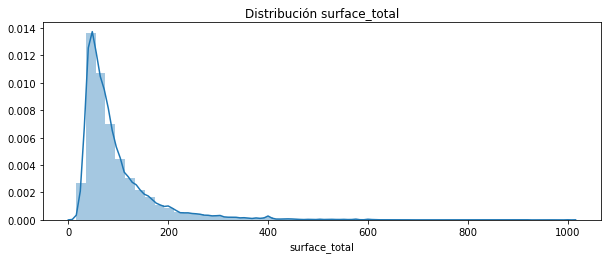

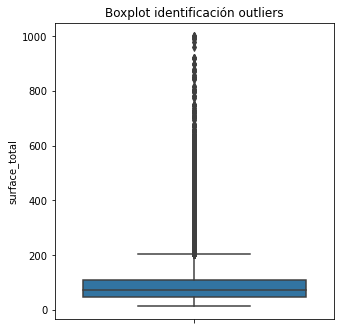

In [6]:
# Gráfico histograma con variable surface_total
fig, ax = plt.subplots(figsize = (22, 8))
plt.subplot(221)
sns.distplot(data_properati_final['surface_total'], bins = 50)
plt.title("Distribución surface_total")
plt.xlabel("surface_total")

# Es mucho más probable encontrar una propiedad con tamaño cerca de 100 m2, que encontrar una con más de 1000 m2

fig, ax = plt.subplots(figsize = (5, 12))
plt.subplot(212)
sns.boxplot(data = data_properati_final, y = "surface_total")
plt.title("Boxplot identificación outliers")
plt.ylabel("surface_total")
plt.show()

# Valores outliers se encuentran desde 200 m2 en adelante
# Puede que estos outliers sean errores al introducir los datos en el dataset

In [7]:
# Rango intercuartilico

q25, q75 = np.percentile(data_properati_final.surface_total.values, [25, 75])
iqr = q75 - q25
minimo = q25 - 2*iqr
maximo = q75 + 2*iqr
print(q25,q75,iqr, minimo, maximo)

# Valores fuera del rango [-75.0, 235.0] serán considerados atípicos

49.0 111.0 62.0 -75.0 235.0


In [8]:
mascara_outliers_surface_total = (data_properati_final.surface_total < minimo) | (data_properati_final.surface_total > maximo)
mascara_outliers_surface_total.sum()

# Se eliminaran 4399 datos atípicos para la variable surface_total

4399

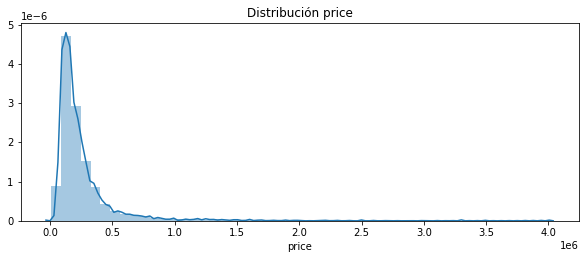

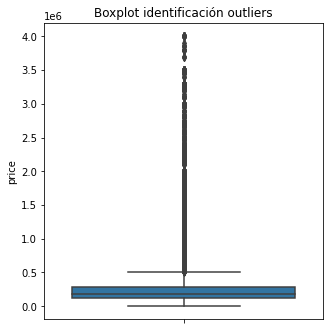

In [9]:
# Se repite el proceso para detectar outliers de la variable price
# Gráfico histograma con variable price
fig, ax = plt.subplots(figsize = (22, 8))
plt.subplot(221)
sns.distplot(data_properati_final['price'], bins = 50)
plt.title("Distribución price")
plt.xlabel('price')

# Es mucho más probable encontrar una propiedad con precio cerca de 1M, que encontrar una de 4M

fig, ax = plt.subplots(figsize = (5, 12))
plt.subplot(212)
sns.boxplot(data = data_properati_final, y = 'price')
plt.title("Boxplot identificación outliers")
plt.ylabel('price')
plt.show()

In [10]:
# Rango intercuartilico 

q25, q75 = np.percentile(data_properati_final.price.values, [25, 75])
iqr = q75 - q25
minimo = q25 - 2*iqr
maximo = q75 + 2*iqr
print(q25,q75,iqr, minimo, maximo)

# Valores fuera del rango [-185000.0, 590000.0] serán considerados atípicos

125000.0 280000.0 155000.0 -185000.0 590000.0


In [11]:
mascara_outliers_price = (data_properati_final.price < minimo) | (data_properati_final.price > maximo)
mascara_outliers_price.sum()

# Se eliminaran 5537 datos atípicos para la variable surface_total

5537

In [12]:
# Dataset sin outliers
# Nuevo filtro a partir de datos obtenidos por rango intercuartilico
data_properati = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")

data_properati_1 = data_properati[(data_properati.l2 == "Capital Federal")]
data_properati_2 = data_properati_1[(data_properati_1.property_type == "Departamento") 
                                    | (data_properati_1.property_type == "PH") 
                                    | (data_properati_1.property_type == "Casa")]
data_properati_3 = data_properati_2[(data_properati_2.surface_total >= -75.0) & (data_properati_2.surface_total < 235.0)]
data_properati_4 = data_properati_3[(data_properati_3.price >= -185000.0) & (data_properati_3.price < 590000.0)]
data_properati_5 = data_properati_4[["rooms", "bedrooms", "bathrooms", "surface_total",
                                     "surface_covered", "price", "property_type"]]
data_properati_final = data_properati_5.dropna()

data_properati_final.shape

(73460, 7)

Text(0.5, 0, 'price')

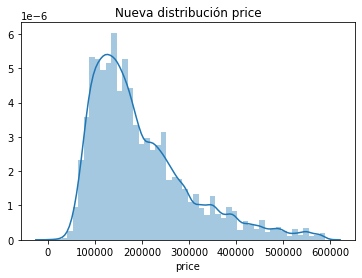

In [13]:
sns.distplot(data_properati_final['price'], bins = 50)
plt.title("Nueva distribución price")
plt.xlabel('price')

# Vemos nueva distribución de datos para variable price

Text(0.5, 0, 'surface_total')

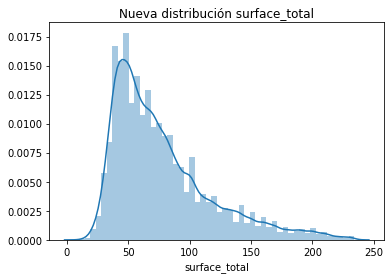

In [14]:
sns.distplot(data_properati_final['surface_total'], bins = 50)
plt.title("Nueva distribución surface_total")
plt.xlabel('surface_total')

# Vemos nueva distribución de datos para variable price

In [15]:
data_properati_final.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000,73460.000000
mean,2.815519,1.858549,1.406657,77.309243,70.231691,196484.704615
std,1.092964,0.918649,0.663930,40.275059,121.327731,104824.657960
min,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,48.000000,43.000000,120000.000000
50%,3.000000,2.000000,1.000000,66.000000,59.000000,168000.000000
75%,3.000000,2.000000,2.000000,96.000000,83.000000,248000.000000
max,21.000000,15.000000,14.000000,234.000000,13402.000000,589794.000000


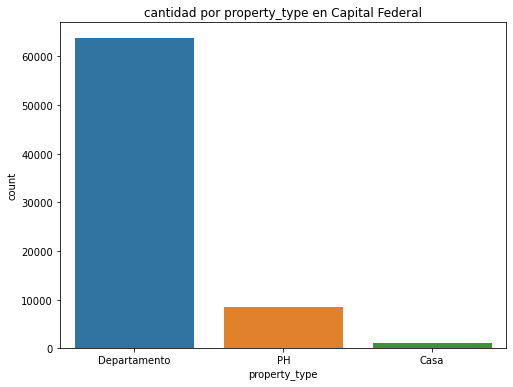

In [16]:
# Encoding
# Se transforma variable property types en dummies para obtener 0 y 1 de acuerdo a cada property type
# No tenemos en cuenta labe encoding pues al ser 3 tipos de propiedad alguna tendría mayor valor (0, 1, 2)
# Gráfico property_type

fig, ax = plt.subplots(figsize = (8, 6))
sns.countplot(data = data_properati_final, x = "property_type")
plt.xticks(rotation = 0)
plt.title("cantidad por property_type en Capital Federal")
plt.show()

# Vamos a llevar esta variable a forma númerica
# Se tomaran las categorías más representativas: Departamento y PH

In [17]:
# Dummies 
data_properati_final = pd.get_dummies(data_properati_final, columns=["property_type"])

In [18]:
data_properati_final.head()
# 3 nuevas variables property_type_Casa, property_type_Departamento y property_type_PH

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1


In [19]:
# Nuevo dataset queda con 73460 instancias y 9 variables
data_properati_final.shape

(73460, 9)

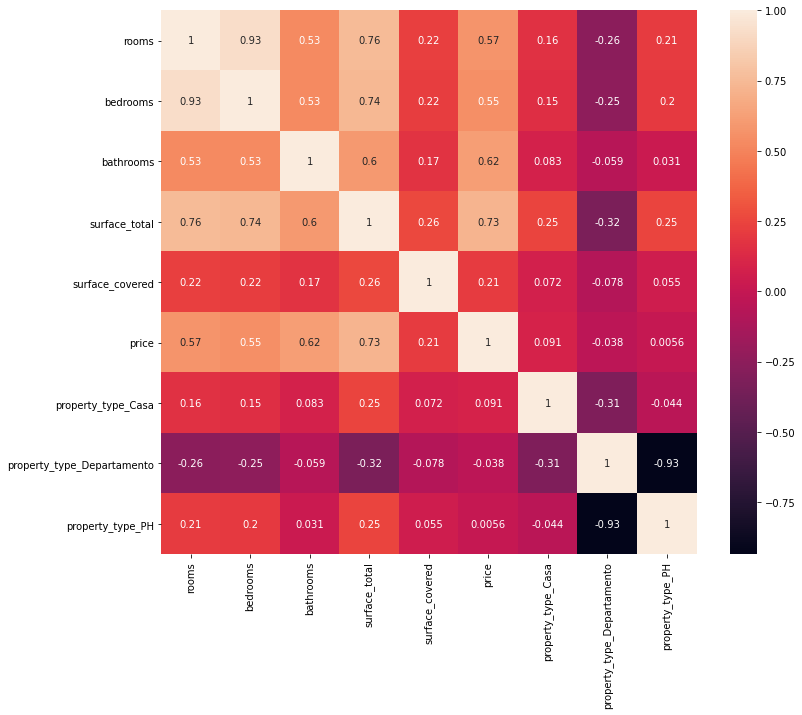

In [20]:
# Vemos la correlación de nuestros datos
# Tenemos en cuenta que tenemos variables continuas, discretas y dummies

corr = data_properati_final.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

In [21]:
# Se escalan las variables discretas para esto dividimos el dataset
# Separamos las varibles discretas de las continuas y dummies
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()

In [22]:
data_variables_dep = data_properati_final[["price","property_type_Casa", "property_type_Departamento", "property_type_PH"]]
data_variables_dep = pd.DataFrame(data_variables_dep)
data_variables_dep

,price,property_type_Casa,property_type_Departamento,property_type_PH
0,153000.0,0,1,0
1,159000.0,0,0,1
2,125000.0,0,0,1
3,295000.0,0,0,1
5,150000.0,0,0,1
...,...,...,...,...
146550,298000.0,0,0,1
146552,539000.0,0,1,0
146554,570000.0,0,0,1
146555,480000.0,0,0,1


In [23]:
data_variables_indep = data_properati_final.drop(["price","property_type_Casa", "property_type_Departamento", "property_type_PH"], axis=1)
data_variables_indep

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0
...,...,...,...,...,...
146550,5.0,2.0,2.0,114.0,95.0
146552,4.0,2.0,3.0,159.0,98.0
146554,4.0,3.0,3.0,175.0,111.0
146555,3.0,2.0,2.0,144.0,134.0


In [24]:
data_variables_indep_scl = scl.fit_transform(data_variables_indep.values)

In [25]:
data_variables_indep_final = pd.DataFrame(data_variables_indep_scl, index = data_variables_indep.index, columns = data_variables_indep.columns)
data_variables_indep_final

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,3.828590,5.596793,0.893690,1.556576,0.575044
1,-0.746158,-0.934584,0.893690,-0.181484,-0.100816
2,-0.746158,-0.934584,-0.612504,-0.802220,-0.207965
3,-0.746158,-0.934584,-0.612504,0.190957,-0.166754
5,-0.746158,-0.934584,-0.612504,-0.529096,-0.117300
...,...,...,...,...,...
146550,1.998690,0.153978,0.893690,0.911011,0.204145
146552,1.083741,0.153978,2.399883,2.028335,0.228872
146554,1.083741,1.242541,2.399883,2.425606,0.336020
146555,0.168791,0.153978,0.893690,1.655894,0.525591


In [26]:
data_properati_final = pd.concat([data_variables_indep_final, data_variables_dep], axis='columns')
data_properati_final

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,3.828590,5.596793,0.893690,1.556576,0.575044,153000.0,0,1,0
1,-0.746158,-0.934584,0.893690,-0.181484,-0.100816,159000.0,0,0,1
2,-0.746158,-0.934584,-0.612504,-0.802220,-0.207965,125000.0,0,0,1
3,-0.746158,-0.934584,-0.612504,0.190957,-0.166754,295000.0,0,0,1
5,-0.746158,-0.934584,-0.612504,-0.529096,-0.117300,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146550,1.998690,0.153978,0.893690,0.911011,0.204145,298000.0,0,0,1
146552,1.083741,0.153978,2.399883,2.028335,0.228872,539000.0,0,1,0
146554,1.083741,1.242541,2.399883,2.425606,0.336020,570000.0,0,0,1
146555,0.168791,0.153978,0.893690,1.655894,0.525591,480000.0,0,0,1


In [27]:
# Obtenemos el data set final, con sus datos escalados y sin outliers para empezar los modelos

In [28]:
# MODELO 1 Comparacion con modelo Proyecto_01
# Entrenamos modelo de Proyecto_01 con dataset transformado
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [29]:
# Regresión Multivariada, se incluyen todas las variables de control utilizadas en Proyecto_01 y nuevas
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth = 3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors = 2)

In [30]:
# Se define variable X
X = data_properati_final[['surface_total', 'surface_covered', 'bathrooms', 
                          'bedrooms', 'rooms', 'property_type_Departamento' ]]
X.columns

Index(['surface_total', 'surface_covered', 'bathrooms', 'bedrooms', 'rooms',
       'property_type_Departamento'],
      dtype='object')

In [31]:
# Se define variable y
y = data_properati_final['price']
y

0         153000.0
1         159000.0
2         125000.0
3         295000.0
5         150000.0
            ...   
146550    298000.0
146552    539000.0
146554    570000.0
146555    480000.0
146557    420000.0
Name: price, Length: 73460, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [33]:
# Se entrenan los modelos

linear_model.fit(X_train, y_train)  # Betas de linear_model
tree_regressor.fit(X_train, y_train) # Como se dividen los datos en el tree_regressor
knn_regressor.fit(X_train, y_train) # Mapeo datos en el knn

KNeighborsRegressor(n_neighbors=2)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 65058.98606184587
Raíz del error cuadrático medio en Test: 65822.22728780225


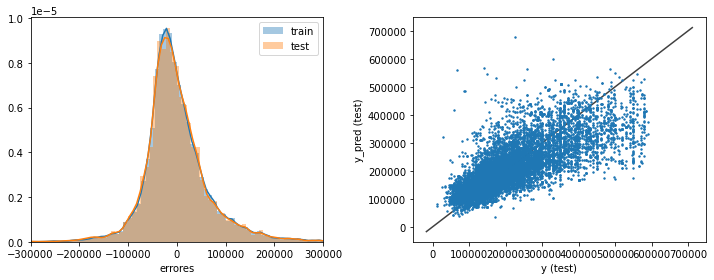

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 65483.08535133128
Raíz del error cuadrático medio en Test: 65817.23658119152


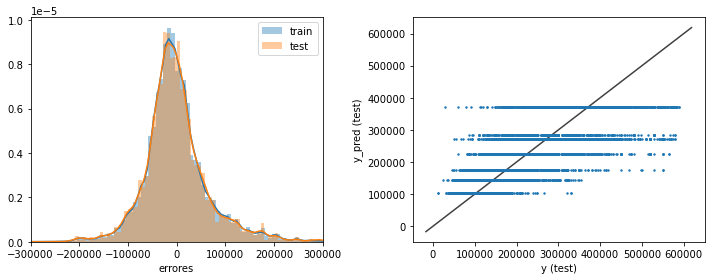

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 43834.406769355155
Raíz del error cuadrático medio en Test: 55557.69073338754


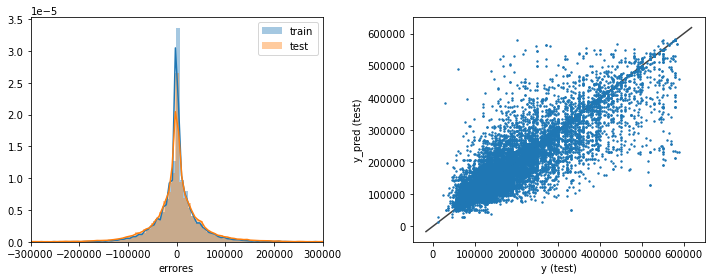

In [34]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 100, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 100, label = 'test')
    plt.xlim(-300000, 300000)
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [35]:
# ¿Que modelo entrenado elegir?

# Modelo actual tiene mejor desempeño que modelo de Proyecto_01 ya que se tienen datos más precisos
# Escalar los datos y eliminar los outliers favorece el desempeño del modelo, para este caso
# Modelo Árbol de Decisión al igual que en el DS_Proyecto_01, teniendo este un mejor rendimiento
# La diferencia entre el RMSE de la muestra train y la muestra test, es la menor
# El modelo es más preciso al hacer la regresión
# Se podría generalizar con más facilidad, en comparación a los otros 2 modelos, para este caso (Regresión lineal y KNN)

In [36]:
# Modelos avanzados

In [37]:
data_properati_final.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,3.828590,5.596793,0.893690,1.556576,0.575044,153000.0,0,1,0
1,-0.746158,-0.934584,0.893690,-0.181484,-0.100816,159000.0,0,0,1
2,-0.746158,-0.934584,-0.612504,-0.802220,-0.207965,125000.0,0,0,1
3,-0.746158,-0.934584,-0.612504,0.190957,-0.166754,295000.0,0,0,1
5,-0.746158,-0.934584,-0.612504,-0.529096,-0.117300,150000.0,0,0,1


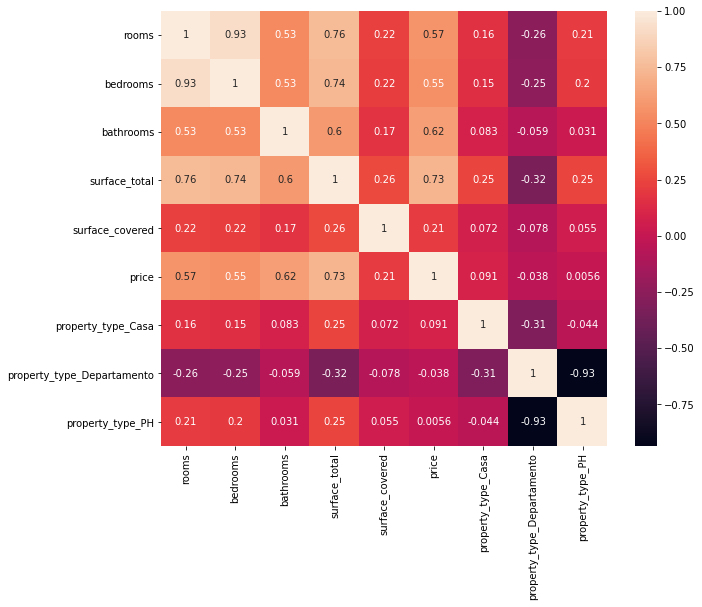

In [38]:
corr = data_properati_final.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

In [39]:
# MODELO 2 (Parte B)
# Regresión Lineal (Benchmark)
X = data_properati_final[['surface_covered', 'bedrooms', 'bathrooms', 'property_type_Departamento']]
print(X.columns)

y = data_properati_final['price']
print(y)

Index(['surface_covered', 'bedrooms', 'bathrooms',
       'property_type_Departamento'],
      dtype='object')
0         153000.0
1         159000.0
2         125000.0
3         295000.0
5         150000.0
            ...   
146550    298000.0
146552    539000.0
146554    570000.0
146555    480000.0
146557    420000.0
Name: price, Length: 73460, dtype: float64


In [40]:
from sklearn.decomposition import PCA
pca = PCA()

X = pca.fit_transform(X)

In [41]:
# Se realiza tran test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [42]:
# Se define el modelo
from sklearn.linear_model import LinearRegression
reg_2 = LinearRegression()

In [43]:
# Se entrena
reg_2.fit(X_train, y_train)

LinearRegression()

In [44]:
# Se predice
y_train_pred_2 = reg_2.predict(X_train)
y_test_pred_2 = reg_2.predict(X_test)

Raíz del error cuadrático medio en Train: 76497.870711293
Raíz del error cuadrático medio en Test: 77770.77184887973


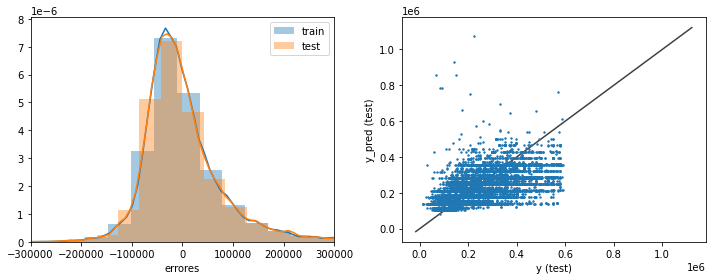

In [45]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_2, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 30, label = 'test')
plt.xlabel('errores')
plt.xlim(-300000, 300000)
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#¿Que modelo entrenado elegir?

# Elegimos la nueva regresión lineal? El RMSE es mayor que en proyecto 1
# La diferencia entre el RMSE de la muestra train y la muestra test es pequeña perop el modelo puede mejorar
# Se decide probar otros modelos

In [46]:
# Empezamos a buscar el mejor modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [47]:
reg_rf = RandomForestRegressor()
reg_knn = KNeighborsRegressor()
reg_xgb = xgb.XGBRegressor()

In [48]:
reg_rf.fit(X_test, y_test)

RandomForestRegressor()

In [49]:
reg_knn.fit(X_test, y_test)

KNeighborsRegressor()

In [50]:
reg_xgb.fit(X_test, y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
# Modelo Random Forest
# Buscamos mejores hiperparametros
tree_parameters = {'n_estimators':[100, 200, 300],
              'max_depth': [None, 5, 10, 15, 20], 
              'max_features': ['auto', 'log2']}

In [52]:
tree_model = GridSearchCV(reg_rf, param_grid=tree_parameters, cv=4, n_jobs=-2)
tree_model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-2,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [53]:
print("Mejores parametros: "+str(tree_model.best_params_))
print("Mejor Score: "+str(tree_model.best_score_)+'\n')

tree_score = pd.DataFrame(tree_model.cv_results_)

Mejores parametros: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
Mejor Score: 0.6955735299980622



In [54]:
y_train_pred_rf = tree_model.predict(X_train)
y_test_pred_rf = tree_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))

55639.225414190885
57306.21230672616


In [55]:
# Modelo KNN
# Buscamos mejores hiperparametros
knn_parameters = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29],
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10, 11, 13, 15],
              'algorithm':['auto', 'kd_tree']}

In [56]:
knn_model = GridSearchCV(reg_knn, param_grid=knn_parameters, cv=4, n_jobs=-2)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(), n_jobs=-2,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10, 11, 13, 15],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']})

In [57]:
print("Mejores parametros: "+str(knn_model.best_params_))
print("Mejor Score: "+str(knn_model.best_score_)+'\n')

knn_score = pd.DataFrame(knn_model.cv_results_)

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 29, 'weights': 'distance'}
Mejor Score: 0.6862195884351118



In [58]:
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)
print('Error en train: ', np.sqrt(mean_squared_error(y_train, y_train_pred_knn)))
print('Error en test: ', np.sqrt(mean_squared_error(y_test, y_test_pred_knn)))

Error en train:  53875.91333226452
Error en test:  57778.15432664399


In [59]:
# Modelo XGB
# Buscamos mejores hiperparametros
xgb_parameters = {'n_estimators':[100, 200, 300, 400],
           'max_depth': [4,6,8,10],
           'eta': [0.1,0.3, 0.5],
           'max_levels': [4,5,6,7,8],
           'subsample': [0.5,0.75,1.0]}

In [60]:
xgb_model = GridSearchCV(reg_xgb, param_grid= xgb_parameters, cv=4, n_jobs=-2)
xgb_model.fit(X_train, y_train)

[15:08:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { max_levels } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [61]:
print("Mejores parametros: "+str(xgb_model.best_params_))
print("Mejor Score: "+str(xgb_model.best_score_)+'\n')

xgb_score = pd.DataFrame(xgb_model.cv_results_)

Mejores parametros: {'eta': 0.1, 'max_depth': 4, 'max_levels': 4, 'n_estimators': 300, 'subsample': 1.0}
Mejor Score: 0.695921344288487



In [62]:
y_train_pred_xgb= xgb_model.predict(X_train)
y_test_pred_xgb= xgb_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))

54618.88000765608
57059.833609029985


In [63]:
pc = pd.DataFrame(data = pca.components_, index = ['PC1', 'PC2', 'PC3', 'PC4'])
pc

# 0 = 'surface_covered', 1 = 'bedrooms', 2 = 'bathrooms', 3 = 'property_type_Departamento'
# Componente 1 toma bedrooms como la más importante 
# Componente 2 y 3 toman surface_covered como la más importante
# Componente 4 toma property_type_Departamento como la más importante 

,0,1,2,3
PC1,0.393430,0.657945,0.640136,-0.050478
PC2,0.916474,-0.228054,-0.328729,0.001784
PC3,0.072076,-0.707633,0.692513,0.120362
PC4,0.009632,0.119816,-0.050888,0.991444


In [64]:
pd.DataFrame(pc.mean())
# Encontramos que los mejores predictores son:
# surface_covered (34%)
# bathrooms (23%)
# property_type_Departamento (26%)

,0
0,0.347903
1,-0.039482
2,0.238258
3,0.265778


[0.53146931 0.28344323 0.1514397  0.03364777]


Text(0, 0.5, 'varianza explicada')

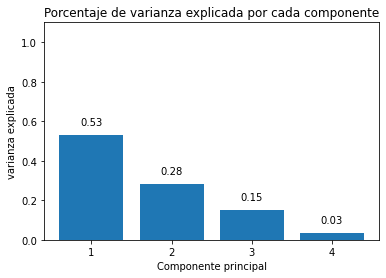

In [66]:
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x = np.arange(pca.n_components_) + 1, height = pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(X)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label, (x,y),textcoords="offset points",xytext=(0,10),ha="center")

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title("Porcentaje de varianza explicada por cada componente")
ax.set_xlabel("Componente principal")
ax.set_ylabel("varianza explicada")

# Al primer componente se le atribuye el 53% de la varianza explicada

In [67]:
# Teniendo los mejores hiperparameters por cada modelo, vamos a ver cual resulta mejor
# Pero antes probaremos:
# Atributos polinómicos
# Ridge
# Lasso

In [104]:
# Atributos polinómicos
from sklearn.preprocessing import PolynomialFeatures

X = data_properati_final[['surface_covered', 'bedrooms', 'bathrooms', 'property_type_Departamento']]
print(X.columns)

y = data_properati_final['price']
print(y)

Index(['surface_covered', 'bedrooms', 'bathrooms',
       'property_type_Departamento'],
      dtype='object')
0         153000.0
1         159000.0
2         125000.0
3         295000.0
5         150000.0
            ...   
146550    298000.0
146552    539000.0
146554    570000.0
146555    480000.0
146557    420000.0
Name: price, Length: 73460, dtype: float64


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
poly = PolynomialFeatures(3, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(51422, 34) (22038, 34)


In [107]:
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
print(reg_2.coef_, reg_2.intercept_)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

[ 1.43742902e+05  1.46520401e+04  2.40115454e+04  1.27478779e+04
 -6.16067613e+03  4.19856293e+04  6.43815697e+04  6.66695937e+04
 -6.66718953e+03 -2.07615413e+04 -1.03729322e+04 -5.23828326e+03
  7.25866136e+03  1.27478779e+04  7.78991094e+01 -1.35724940e+03
 -4.48448527e+02 -3.12802435e+03 -1.19328288e+04 -3.91459227e+04
  9.02456718e+03 -1.06737464e+03 -2.48663132e+04  6.66695937e+04
  9.35707130e+02  7.25586959e+03 -3.23345631e+03  2.39217480e+03
  1.90260407e+03 -1.03729322e+04  2.26455738e+02  3.53046700e+02
  7.25866136e+03  1.27478779e+04] 177390.5654462492


In [108]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_3))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_3))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 76497.870711293
Raíz del error cuadrático medio en Test: 77770.77184887973


In [109]:
# Ridge
from sklearn.linear_model import Ridge, Lasso

In [110]:
X_train, X_test, y_train_ridge, y_test_ridge = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
reg_ridge = Ridge(alpha= 0.005)
reg_ridge.fit(X_train_new, y_train)

y_train_pred_ridge = reg_ridge.predict(X_train_new)
y_test_pred_ridge = reg_ridge.predict(X_test_new)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [ 1.43741595e+05  1.46522173e+04  2.40117507e+04  1.27478279e+04
 -6.16065492e+03  4.19860341e+04  6.43803536e+04  6.66698653e+04
 -6.66728119e+03 -2.07613120e+04 -1.03729577e+04 -5.23826216e+03
  7.25858095e+03  1.27478279e+04  7.78989204e+01 -1.35724956e+03
 -4.48444972e+02 -3.12802288e+03 -1.19327956e+04 -3.91457065e+04
  9.02425010e+03 -1.06724623e+03 -2.48654026e+04  6.66698653e+04
  9.35707766e+02  7.25583448e+03 -3.23339036e+03  2.39212843e+03
  1.90242123e+03 -1.03729577e+04  2.26454248e+02  3.53035290e+02
  7.25858086e+03  1.27478279e+04]
Ordenada: 177390.7054937593


In [112]:
rmse_train = np.sqrt(mean_squared_error(y_train_ridge, y_train_pred_ridge))
rmse_test = np.sqrt(mean_squared_error(y_test_ridge, y_test_pred_ridge))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 63219.6306659063
Raíz del error cuadrático medio en Test: 110977.02181672718


In [113]:
# Lasso

In [114]:
X_train, X_test, y_train_lasso, y_test_lasso = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train_new,y_train)

y_train_pred_lasso = reg_lasso.predict(X_train_new)
y_test_pred_lasso = reg_lasso.predict(X_test_new)

print(reg_lasso.coef_, reg_lasso.intercept_)

[ 7.29593087e+04  2.66106846e+04  2.84527006e+04  2.84090012e+04
 -3.70444840e+03  4.98364342e+04  9.32329688e+04  1.49190160e+05
 -9.23498741e+03 -2.71553377e+04 -2.78599021e+04 -5.98787508e+03
  9.88745267e+03  5.74120095e+03  6.45204017e+01 -7.99756306e+02
 -5.94958987e+02 -4.60994873e+03 -9.68771265e+03 -3.63457113e+04
 -9.58339181e+03 -5.13781585e+03 -4.16004467e+04  4.64289830e+04
  8.65237721e+02  6.66856241e+03 -3.87905882e+01  3.17009533e+03
  7.36784239e+03 -4.40875491e+03  2.49075968e+02  5.35455054e+02
  1.41789249e+03  1.98377847e+03] 179700.17468800733


/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103810653707082.48, tolerance: 56169570997.48259
  model = cd_fast.enet_coordinate_descent(


In [116]:
rmse_train = np.sqrt(mean_squared_error(y_train_lasso, y_train_pred_lasso))
rmse_test = np.sqrt(mean_squared_error(y_test_lasso, y_test_pred_lasso))

print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 63542.07631262939
Raíz del error cuadrático medio en Test: 129740.90473617804


In [117]:
# Atributos polinómicos
# Ridge
# Lasso
# Son descartados, este tipo de modelos no se ajusta a lo buscado

In [118]:
# Buscamos mejores modelos
# Teniendo los mejores hiperparameters por cada modelo, ahora sí vamos a ver cual resulta mejor

# Buscamos el mejor modelo entre:
# Random Forest con sus mejore parameters
# KNN con sus mejore parameters
# XGBoost con sus mejore parameters

In [69]:
X_2 = data_properati_final[['surface_covered', 'bedrooms', 'bathrooms', 'property_type_Departamento']]
print(X)

y_2 = data_properati_final['price']
print(y)

[[ 4.47407514 -1.04290662 -3.28433444  0.76080474]
 [-0.03863473 -0.17459098  1.16840715 -1.01971251]
 [-1.04495836  0.22233932  0.1176263  -0.9440972 ]
 ...
 [ 2.5298261  -0.76587363  0.70234493 -0.83129794]
 [ 0.92402643  0.15124346  0.44325306 -0.88325199]
 [ 0.90921817  0.23611915  0.5701497   0.10906554]]
0.03364776837341436


In [70]:
pca_2 = PCA()

X_2 = pca_2.fit_transform(X_2)

In [71]:
# Se realiza tran test split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size= 0.3, random_state= 42)

In [72]:
from sklearn.linear_model import LinearRegression
reg_3 = LinearRegression()

In [73]:
reg_3.fit(X_train, y_train)

LinearRegression()

In [74]:
y_train_pred_3 = reg_3.predict(X_train)
y_test_pred_3 = reg_3.predict(X_test)

Raíz del error cuadrático medio en Train: 76497.870711293
Raíz del error cuadrático medio en Test: 77770.77184887973


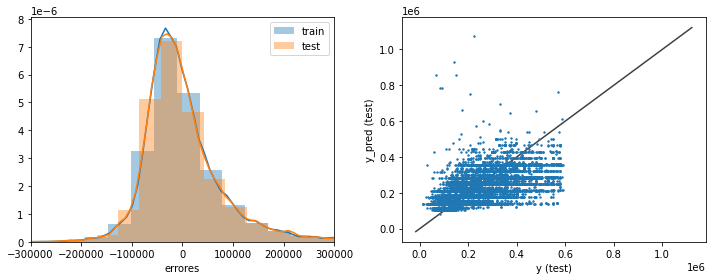

In [75]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_3))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_3))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_3, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred_3, bins = 30, label = 'test')
plt.xlabel('errores')
plt.xlim(-300000, 300000)
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_3, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [78]:
# Random Forest con sus mejore parameters
rf_best = RandomForestRegressor(max_depth = 10, max_features = 'log2', n_estimators = 200)

In [79]:
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=200)

In [80]:
rf_best.score(X_train, y_train)

0.716595554554891

In [81]:
y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)

In [82]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 55639.01085815331
Raíz del error cuadrático medio en Test: 57337.81160085757


In [83]:
# KNN con sus mejore parameters

In [84]:
knn_best = KNeighborsRegressor(algorithm = 'auto', leaf_size = 10, n_neighbors = 29, weights = "distance")

In [85]:
knn_best.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=29, weights='distance')

In [86]:
knn_best.score(X_train, y_train)

0.734272104308691

In [87]:
y_train_pred_knn = knn_best.predict(X_train)
y_test_pred_knn = knn_best.predict(X_test)

In [88]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 53875.91333226452
Raíz del error cuadrático medio en Test: 57778.15432664399


In [95]:
# XGBoost con sus mejore parameters

In [96]:
xgb_best = xgb.XGBRegressor(eta= 0.1, max_depth= 4, max_levels= 4, n_estimators= 300, subsample= 1.0)

In [97]:
xgb_best.fit(X_train, y_train)

[17:21:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { max_levels } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=4,
             max_levels=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1.0, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [98]:
xgb_best.score(X_train, y_train)

0.7095074364126657

In [99]:
y_train_pred_xgb = xgb_best.predict(X_train)
y_test_pred_xgb = xgb_best.predict(X_test)

In [100]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 56330.496747368365
Raíz del error cuadrático medio en Test: 57719.53656801628


In [101]:
# XGBoost y Random Forest tienen metricas similares
# Sin embargo el costo computacional de XGBoost en mucho mayor
# Incluso en tiempo es espera al buscar los mejores hiperparameters
# Por esta razón el mejor modelo es el Random Forest.

In [120]:
# Para la útlima parte del proyecto (Parte C)
# Buscamos cual resultó ser la mejor variable para el modelo elegido como el mejor
# Random Forest

importancia_predictores = pd.DataFrame({"Predictor": X.columns,"Importancia": rf_best.feature_importances_})
print("Importancia de los predictores en el modelo Random Forest")
importancia_predictores.sort_values("Importancia", ascending=False)

Importancia de los predictores en el modelo Random Forest


,Predictor,Importancia
0,surface_covered,0.526582
1,bedrooms,0.166397
2,bathrooms,0.160218
3,property_type_Departamento,0.146804


In [ ]:
# La variable surface_covered fue la más importante o relevante para el modelo
# Se esperaba esto ya que la correlación con el precio era relativamente alta
# Aunque las otra variables incluidas resultan con un peso de importancia similar,
# creo importante incluir nuevas variables
# en este caso el dataset nos limita, pero seria ideal usar variables como:
# -Segmento (Estrato socioeconómico)
# -Servicios comunales (ej: piscina, canchas de fútbol, parques)
# -Acabados (ej: cocina con marmol, horno electrico)
# -Distancia a centros de trabajo
# -Acceso a transporte público
# Porqué?
# son variables que tiene en cuenta los costos de oportunidad relevantes a la hora de darle precio a una vivienda